In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

rows = ['KEGG_RNA_POLYMERASE',
'KEGG_SPLICEOSOME',
'KEGG_CELL_CYCLE',
'KEGG_BASE_EXCISION_REPAIR',
'KEGG_PROTEASOME',
'KEGG_OOCYTE_MEIOSIS',
'KEGG_NUCLEOTIDE_EXCISION_REPAIR',
'KEGG_PYRIMIDINE_METABOLISM',
'KEGG_RIBOSOME',
'KEGG_DNA_REPLICATION',
'KEGG_HOMOLOGOUS_RECOMBINATION',
'KEGG_MISMATCH_REPAIR',
'KEGG_RNA_DEGRADATION',
'KEGG_P53_SIGNALING_PATHWAY',
'KEGG_AMINOACYL_TRNA_BIOSYNTHESIS',
'KEGG_TERPENOID_BACKBONE_BIOSYNTHESIS',
'KEGG_SYSTEMIC_LUPUS_ERYTHEMATOSUS',
'KEGG_CYTOSOLIC_DNA_SENSING_PATHWAY',
'KEGG_PROGESTERONE_MEDIATED_OOCYTE_MATURATION',
'KEGG_BLADDER_CANCER']

df = pd.read_csv("./data/gsea_report_for_low_1684386912385.csv")
df = df[df["Pathways"].isin(rows)]

# use the scatterplot function
sns.set_style(style='white')
# sns.set(rc = {'figure.figsize':(8,8)})
sns.scatterplot(data=df, x="Normalised Enrichment Score", y="Pathways", size="SIZE", hue="NOM p-val",alpha= 0.7, sizes=(40, 100))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=8)

# show the graph

plt.xlim(1.2,2.2)
plt.subplots_adjust(bottom=0.15)
plt.subplots_adjust(left=0.37, right=0.8)
plt.title("GSEA Results", fontsize= 15)
plt.tick_params(axis='y', labelsize=5)
plt.savefig('GSEA.jpeg',dpi=200)
plt.show()

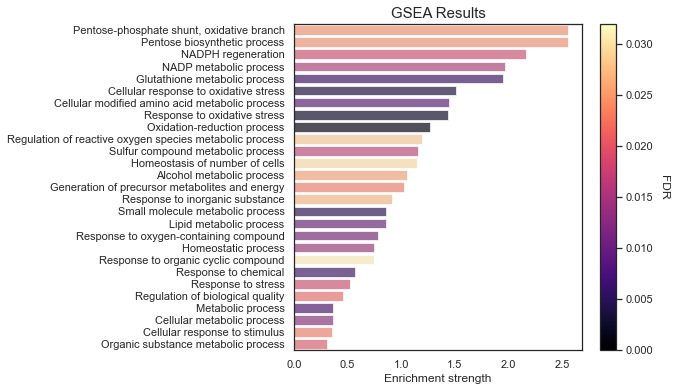

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./String/string_expanded_list_AOS.csv")

# use the scatterplot function

sns.set(rc = {'figure.figsize':(10,6)})
sns.set_style(style='white')

norm = plt.Normalize(df["false discovery rate"].min(), df["false discovery rate"].max())
sm = plt.cm.ScalarMappable(cmap="magma", norm=norm)
sm.set_array([])



ax = sns.barplot(data=df, x= "strength", y="term description", hue = "false discovery rate", dodge = False, palette='magma', alpha = 0.7)
ax.get_legend().remove()
cbar = ax.figure.colorbar(sm)
cbar.set_label('FDR', rotation=270, labelpad=15)


# show the graph
plt.title("GSEA Results", fontsize= 15)
ax.set(ylabel=None)
ax.set_xlabel("Enrichment strength")
# plt.subplots_adjust(bottom=0.15)
plt.subplots_adjust(left=0.4)
plt.savefig('GSEA_fromheatmap_expanded_list.jpeg',dpi=200)
plt.show()

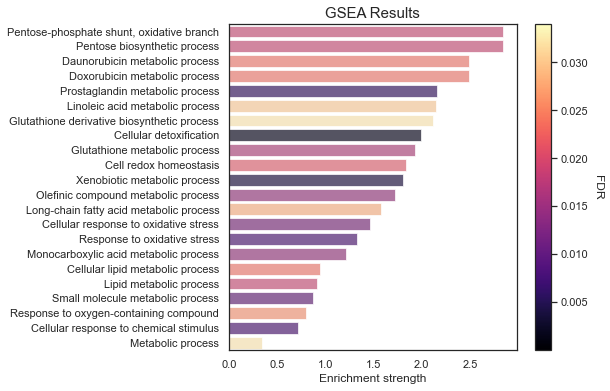

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./String/enrichment.Process_nrf2.tsv", sep='\t')

# use the scatterplot function

sns.set(rc = {'figure.figsize':(10,6)})
sns.set_style(style='white')

norm = plt.Normalize(df["false discovery rate"].min(), df["false discovery rate"].max())
sm = plt.cm.ScalarMappable(cmap="magma", norm=norm)
sm.set_array([])



ax = sns.barplot(data=df, x= "strength", y="term description", hue = "false discovery rate", dodge = False, palette='magma', alpha = 0.7)
ax.get_legend().remove()
cbar = ax.figure.colorbar(sm)
cbar.set_label('FDR', rotation=270, labelpad=15)


# show the graph
plt.title("GSEA Results", fontsize= 15)
ax.set(ylabel=None)
ax.set_xlabel("Enrichment strength")
# plt.subplots_adjust(bottom=0.15)
plt.subplots_adjust(left=0.4)
plt.savefig('GSEA_fromheatmap_nrf2.jpeg',dpi=200)
plt.show()